# Visualization

## Gathering the necessary materials

### Importing Dependencies

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import plotly.figure_factory as ff
import pandas as pd
init_notebook_mode(connected = True)
import cufflinks as cf 
cf.go_offline()

### Importing the cleaned csv's into Data Frames

In [6]:
onemin_df = pd.read_csv('../CSVs/cleaned/1min.csv')
fourmin_df = pd.read_csv('../CSVs/cleaned/4min.csv')
thirtymin_df = pd.read_csv('../CSVs/cleaned/30min.csv')
sixtymin_df = pd.read_csv('../CSVs/cleaned/60min.csv')
onehun_df = pd.read_csv('../CSVs/cleaned/100m.csv')
fivehun_df = pd.read_csv('../CSVs/cleaned/500m.csv')
onek_df = pd.read_csv('../CSVs/cleaned/1000m.csv')
twok_df = pd.read_csv('../CSVs/cleaned/2000m.csv')
fivek_df = pd.read_csv('../CSVs/cleaned/5000m.csv')
sixk_df = pd.read_csv('../CSVs/cleaned/6000m.csv')
tenk_df = pd.read_csv('../CSVs/cleaned/10000m.csv')
halfmarathon_df = pd.read_csv('../CSVs/cleaned/21097m.csv')
marathon_df = pd.read_csv('../CSVs/cleaned/42195m.csv')

### The Final Data Frame

In [9]:
# appending all of the individial test data frames into one overall one
final_df = onemin_df.append([fourmin_df, thirtymin_df, sixtymin_df, onehun_df,fivehun_df, onek_df, twok_df,\
                            fivek_df, sixk_df, tenk_df, halfmarathon_df, marathon_df], ignore_index = True)

# creating a CSV with the final data frame, no index
final_df.to_csv('../CSVs/cleaned/total.csv', index= False)

In [10]:
final_df.head()

,Name,Age,Location,Country,Club/Affiliation,Distance,Verified,Season,Test,Split,Watts,Time,Seconds
0,Phil Clapp,29,NaN,GBR,NaN,431.0,Yes,2020,1min,69.61,1037.66,NaN,NaN
1,Loren Howard,34,NaN,USA,NaN,429.0,Yes,2018,1min,69.93,1023.48,NaN,NaN
2,Phil Clapp,28,NaN,GBR,NaN,428.0,Yes,2019,1min,70.09,1016.48,NaN,NaN
3,Ross Love,33,"Friendswood, TX",USA,NaN,428.0,Yes,2018,1min,70.09,1016.48,NaN,NaN
4,Ross Love,31,"Friendswood, TX",USA,NaN,422.0,Yes,2016,1min,71.09,974.19,NaN,NaN


## Creating the Graphs

### The Most Popular Tests

In [11]:
# getting the test counts, creating a data frame then resetting the index
counts = final_df['Test'].value_counts().to_frame(name = 'Counts')
counts = counts.rename_axis('Test')
counts = counts.reset_index()

In [16]:
# printing out the data frame
counts

,Test,Counts
0,2000m,147654
1,5000m,61806
2,1000m,54740
3,10000m,45546
4,30min,40717
5,500m,38646
6,21097m,19230
7,6000m,18746
8,60min,16822
9,4min,13306


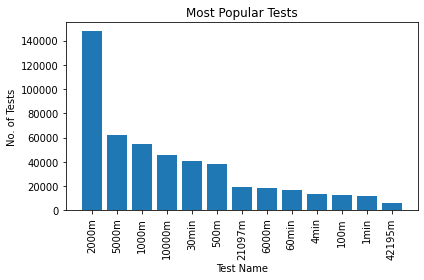

In [14]:
# most popular tests 
plt.xlabel('Test Name')
plt.ylabel('No. of Tests')
plt.title('Most Popular Tests')
plt.xticks(rotation=90)
plt.bar(counts['Test'], counts['Counts'])
plt.show
plt.tight_layout()
plt.savefig('../Images/PopularTests.png')

In [9]:
country = final_df['Country'].value_counts().to_frame(name = 'Counts')
country = country.rename_axis('Country')
country = country.reset_index()
country = country[country['Counts'] > 5000]

In [10]:
country

,Country,Counts
0,USA,189983
1,GBR,99259
2,AUS,29312
3,FRA,28064
4,GER,27030
5,CAN,20610
6,NED,10050
7,IRL,7590
8,DEN,7354
9,NOR,5276


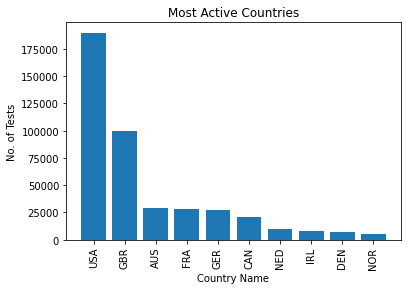

In [11]:
plt.xlabel('Country Name')
plt.ylabel('No. of Tests')
plt.title('Most Active Countries')
plt.xticks(rotation=90)
plt.bar(country['Country'], country['Counts'])
plt.show()

In [12]:
top_contries = country['Country'].unique()

In [13]:
top_contries = top_contries.tolist()

In [14]:
top_contries

['USA', 'GBR', 'AUS', 'FRA', 'GER', 'CAN', 'NED', 'IRL', 'DEN', 'NOR']

In [15]:
club_df = final_df.dropna(subset=['Club/Affiliation'])

In [17]:
usaclub_df = club_df[club_df['Country'] == 'USA']

In [18]:
usaclub_df = usaclub_df['Club/Affiliation'].value_counts().to_frame(name = 'Counts')
usaclub_df = usaclub_df.rename_axis('Club/Affiliation')
usaclub_df = usaclub_df.reset_index()
# usaclub_df = usaclub_df[usaclub_df['Counts'] > 800]

In [21]:
usaclub_df.head(10)

,Club/Affiliation,Counts
0,Age Without Limits,1710
1,LUNA-TICS,1232
2,Unaffiliated,1173
3,Free Spirits,1120
4,Greenville Indoor Rowing,978
5,U.S. Army Veterans,818
6,RowPro Rowers,807
7,U.S. Marines,796
8,U.S. Navy,735
9,USAF Veterans,731


(array([4.87795e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([       0. ,  1868936.2,  3737872.4,  5606808.6,  7475744.8,
         9344681. , 11213617.2, 13082553.4, 14951489.6, 16820425.8,
        18689362. ]),
 <BarContainer object of 10 artists>)

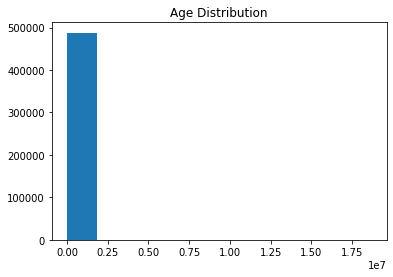

In [29]:
plt.title('Age Distribution')
plt.hist(final_df['Age'])

In [33]:
final_df.shape

(487796, 13)

In [40]:
normal_age = final_df[final_df['Name'] != 'Jay Saret']

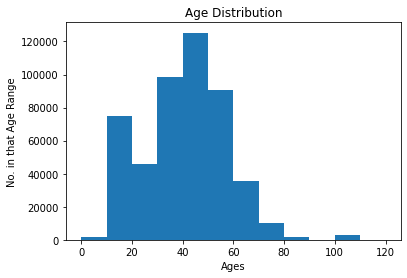

In [46]:
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('No. in that Age Range')
plt.hist(normal_age['Age'], bins = 12)
plt.show()

(array([ 11045.,   9005.,   3713.,   7577.,   6893.,   8788.,  13585.,
         15100.,  14519.,  15017.,  17916.,  19050.,  19777.,  28734.,
         42194.,  51222.,  55582., 148079.]),
 array([2002.        , 2003.05555556, 2004.11111111, 2005.16666667,
        2006.22222222, 2007.27777778, 2008.33333333, 2009.38888889,
        2010.44444444, 2011.5       , 2012.55555556, 2013.61111111,
        2014.66666667, 2015.72222222, 2016.77777778, 2017.83333333,
        2018.88888889, 2019.94444444, 2021.        ]),
 <BarContainer object of 18 artists>)

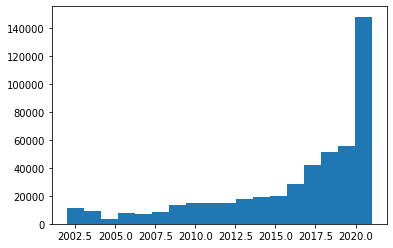

In [47]:
plt.hist(final_df['Season'], bins = 18)

In [50]:
rowing_growth = final_df['Season'].value_counts(sort = False).to_frame(name = 'Counts')
rowing_growth = rowing_growth.rename_axis('Season')
rowing_growth = rowing_growth.reset_index()

In [51]:
rowing_growth

,Season,Counts
0,2002,7249
1,2003,3796
2,2004,9005
3,2005,3713
4,2006,7577
5,2007,6893
6,2008,8788
7,2009,13585
8,2010,15100
9,2011,14519


In [54]:
Seasons = rowing_growth['Season'].unique()

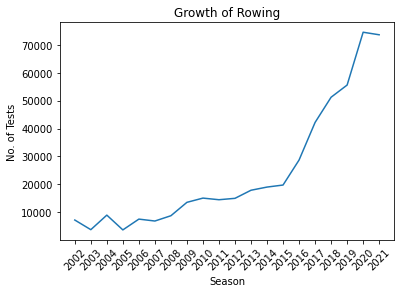

In [56]:
plt.title('Growth of Rowing')
plt.xlabel('Season')
plt.ylabel('No. of Tests')
labels = Seasons.tolist()
plt.xticks(rowing_growth['Season'], labels, rotation ='45')
plt.plot(rowing_growth['Season'], rowing_growth['Counts'])